# ***Initialization***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# ***Database***

170498071/170498071 [==============================] - 2s 0us/step


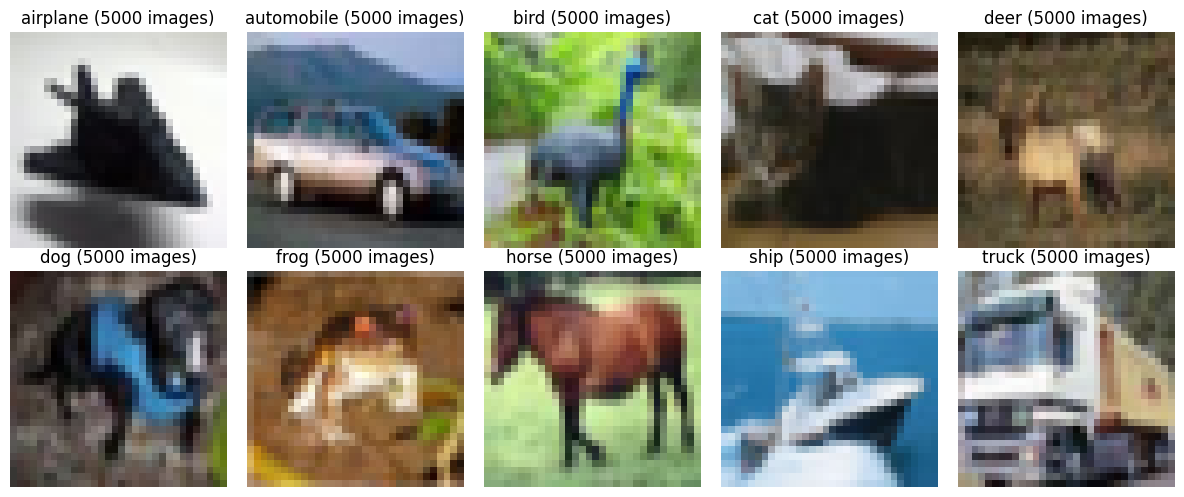

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def plot_images(images, labels, predictions=None):
    """Display a grid of images."""
    assert len(images) == len(labels) == 10


    fig, axes = plt.subplots(2, 5, figsize=(12,5))
    if predictions is None:
        for i, ax in enumerate(axes.flat):
            ax.imshow(images[i])
            class_label = class_names[labels[i][0]]
            count = np.sum(train_labels == labels[i][0])
            ax.set_title(f"{class_label} ({count} images)")
            ax.axis("off")
    else:
        for i, ax in enumerate(axes.flat):
            ax.imshow(images[i])
            true_label = class_names[labels[i][0]]
            count = np.sum(train_labels == labels[i][0])
            pred_label = class_names[predictions[i]]
            ax.set_title(f"True: {true_label} ({count} images)\nPred: {pred_label}", color=("green" if true_label == pred_label else "red"))
            ax.axis("off")

    plt.tight_layout()
    plt.show()


selected_images = []
selected_labels = []

for i in range(10):
    class_idx = np.where(train_labels == i)[0][0]
    selected_images.append(train_images[class_idx])
    selected_labels.append(train_labels[class_idx])

plot_images(selected_images, selected_labels)

train_images, test_images = train_images / 255.0, test_images / 255.0


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# ***Model***

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(train_images)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 64
epochs = 50
history = model.fit(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    steps_per_epoch=train_images.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))


Epoch 1/50
 22/781 [..............................] - ETA: 13:24 - loss: 3.0507 - accuracy: 0.1598

# ***Results***

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
conf_mtx = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print("Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_names))